# K-Means Clustering with Sklearn

# Clustering 1k Songs

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

seed = 123

## Reading the csv, cleaning the DF

In [2]:
a_list_df = pd.read_csv(r"C:\Users\Administrator\Desktop\WBS CODING\Bootcamp\Chapter 6\Materials\audio_features_1000_songs\df_audio_features_1000",
                        index_col = ["name", "artist"])

In [3]:
a_list_df.drop(['id', 'html'], axis=1, inplace=True)

In [4]:
a_list_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
name,artist,,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4
"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4
Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4


In [5]:
a_list_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,0.0,1.440000e+03,1440.000000
mean,0.538917,0.494241,5.154861,-11.098032,0.663194,0.086273,0.469774,0.188482,0.174391,0.472576,115.249066,NaN,2.912083e+05,3.889583
std,0.219193,0.281917,3.540932,6.979107,0.472782,0.086193,0.374637,0.336594,0.146007,0.287807,31.611805,NaN,2.280920e+05,0.446937
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,0.019600,49.689000,NaN,6.275800e+04,1.000000
25%,0.386000,0.243000,2.000000,-14.927250,0.000000,0.038400,0.083025,0.000000,0.090700,0.214750,91.014250,NaN,1.930300e+05,4.000000
50%,0.562000,0.529500,5.000000,-8.939500,1.000000,0.048200,0.419000,0.000127,0.118000,0.476500,110.008000,NaN,2.336965e+05,4.000000
75%,0.710250,0.733000,8.000000,-5.677250,1.000000,0.088825,0.869250,0.159750,0.203000,0.720000,135.587000,NaN,3.080625e+05,4.000000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,0.985000,206.313000,NaN,3.815787e+06,5.000000


## Scaling the data

In [6]:
# importing the transformer 
from sklearn.preprocessing import MinMaxScaler

In [7]:
# initialise the transformer
min_max = MinMaxScaler(feature_range = (0,1))

In [8]:
# fitting the transformer to the data 
min_max.fit(a_list_df)

MinMaxScaler()

In [9]:
# using transformer to transform the data
scaled_a_list = min_max.transform(a_list_df)

In [10]:
# back to a DataFrame
the_list_df = pd.DataFrame(scaled_a_list,
                           index = a_list_df.index,
                           columns = a_list_df.columns)

In [11]:
the_list_df.drop(['type'], axis=1, inplace=True)

In [12]:
the_list_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624060,0.469869,0.909091,0.708800,1.0,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106,0.014474,0.75
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75


## K-Means

In [13]:
the_list_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1440 entries, ('All Shook Up', 'Elvis Presley') to ('Ravel: Boléro, M. 81', 'Maurice Ravel')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1440 non-null   float64
 1   energy            1440 non-null   float64
 2   key               1440 non-null   float64
 3   loudness          1440 non-null   float64
 4   mode              1440 non-null   float64
 5   speechiness       1440 non-null   float64
 6   acousticness      1440 non-null   float64
 7   instrumentalness  1440 non-null   float64
 8   liveness          1440 non-null   float64
 9   valence           1440 non-null   float64
 10  tempo             1440 non-null   float64
 11  duration_ms       1440 non-null   float64
 12  time_signature    1440 non-null   float64
dtypes: float64(13)
memory usage: 233.9+ KB


In [14]:
the_list_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.529984,0.496215,0.468624,0.732188,0.663194,0.114098,0.471659,0.191352,0.159381,0.469210,0.418583,0.060871,0.722396
std,0.242363,0.283055,0.321903,0.153417,0.472782,0.155920,0.376142,0.341720,0.151412,0.298122,0.201832,0.060775,0.111734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360902,0.243960,0.181818,0.648013,0.000000,0.027496,0.083356,0.000000,0.072592,0.202144,0.263850,0.034711,0.750000
50%,0.555506,0.531617,0.454545,0.779638,1.000000,0.045224,0.420681,0.000129,0.100902,0.473275,0.385120,0.045547,0.750000
75%,0.719427,0.735938,0.727273,0.851350,1.000000,0.118714,0.872741,0.162183,0.189049,0.725502,0.548434,0.065362,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X = the_list_df.loc[:, ['danceability', 'loudness']]

In [16]:
# for the whole numerical data
Y = the_list_df

In [17]:
type(X)

pandas.core.frame.DataFrame

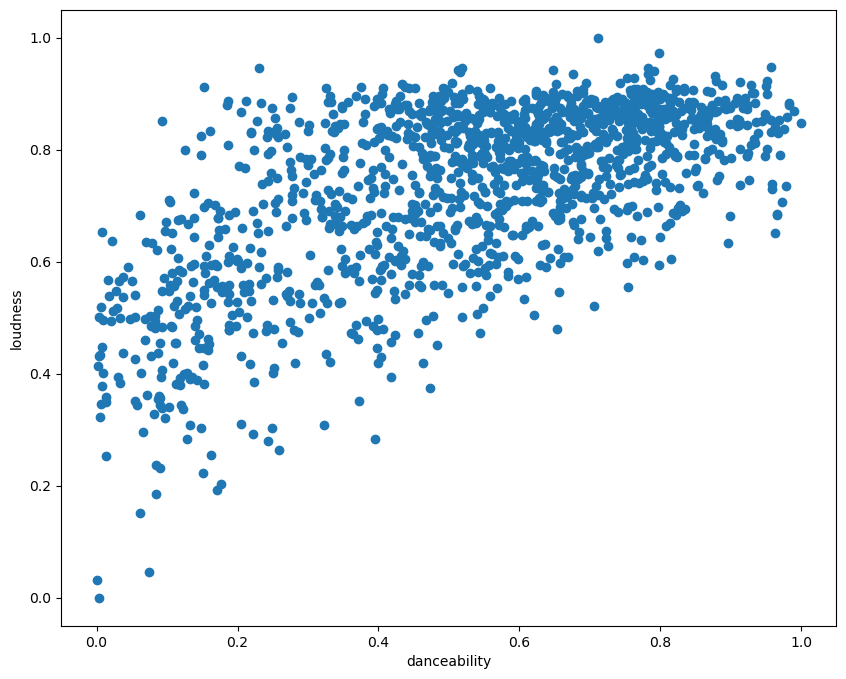

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(x = X['danceability'], y = X['loudness'])
plt.xlabel('danceability')
plt.ylabel('loudness');

In [ ]:
# trial, you will get an error

import plotly.express as px
from sklearn.datasets import make_classification


# Assuming Y is your data array and y is the labels
fig = px.scatter(x=Y[:, 0], y=Y[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

## Finding the K

In [ ]:
Y.drop("cluster", axis=1, inplace=True)

In [ ]:
Y.info()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# using silouhette_score to find the k

from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 35)
km.fit(Y)
silhouette_score(Y, km.labels_)

In [ ]:
sil_scores = [] 
for i in range(10,50):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(Y)
    sil_scores.append(silhouette_score(Y, km.labels_))

In [ ]:
sil_scores

In [ ]:
plt.plot(range(10,50), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

## Clustering

### Experiment #1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 20)
km.fit(Y)

In [ ]:
a_list_df['cluster'] = km.labels_

### Experiment #2

In [ ]:
km = KMeans(n_clusters = 30)
km.fit(Y)

In [ ]:
a_list_df['cluster_30'] = km.labels_

### Experiment #3

In [ ]:
km = KMeans(n_clusters = 34)
km.fit(Y)

In [ ]:
# doesnt work
plt.figure(figsize=(10,5))
plt.scatter(x= a_list_df.iloc[:, 0], y=a_list_df.iloc[:, 1], c= km.labels_)
plt.xlabel('danceability')
plt.ylabel('acousticness');

In [ ]:
Y['cluster'] = km.labels_

In [ ]:
a_list_df['cluster_34'] = km.labels_

In [ ]:
a_list_df.head()

In [ ]:
a_list_df.groupby(by = "cluster_34").count()

In [ ]:
a_list_df.loc[a_list_df['cluster_34'] == 2, :]

### Experiment #4

In [ ]:
km = KMeans(n_clusters = 35)
km.fit(Y)

In [ ]:
Y['cluster_k=35'] = km.labels_

In [ ]:
Y.groupby(by = 'cluster_k=35').count()

In [ ]:
Y.loc[Y['cluster_k=35'] == 30, :]

# Clustering 5k Songs

In [5]:
# First we import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

seed = 123

## Data preparation (reading, exploration, cleaning)

In [6]:
# Read the csv

list_5k = pd.read_csv(r"C:\Users\Administrator\Desktop\WBS CODING\Bootcamp\Chapter 6\Materials\df_audio_features_5000_cleaned_whitespaces.csv",
                      index_col = ["name", "artist"])

In [7]:
list_5k.info()#describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instru

In [8]:
list_5k.head(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
Desafinado,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.107,0.423,142.885,,249387,4,5pstSsK0G4q86gdyy1Spqh,https://open.spotify.com/track/5pstSsK0G4q86gd...
Madalena,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.112,0.684,93.531,,145187,4,33u3dO0JWjerYpFN61J3ug,https://open.spotify.com/track/33u3dO0JWjerYpF...
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.504,0.7330,7,-10.720,1,0.3890,0.696,0.000056,0.673,0.886,96.565,,309760,4,0ylJQpV3K4XnhWhLDMFmH7,https://open.spotify.com/track/0ylJQpV3K4XnhWh...
Brigas Nunca Mais,Paula Morelenbaum,0.694,0.5460,10,-11.452,1,0.0400,0.398,0.076000,0.153,0.641,170.032,,204027,4,1wL2dk42Cxu4zCJs4SvFsZ,https://open.spotify.com/track/1wL2dk42Cxu4zCJ...


In [9]:
list_5k.drop(['type', 'id', 'html'], axis=1, inplace=True)

In [10]:
list_5k.sample(3)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
The Grotesque,Benediction,0.320,0.948,6,-10.626,0,0.0884,0.00155,0.920000,0.2830,0.337,97.403,205947,4
La Nueva Reconquista de Graná,Grupo De Expertos Solynieve,0.229,0.640,9,-7.361,1,0.0469,0.41300,0.755000,0.0927,0.546,166.732,238186,3
Why Do Fools Fall In Love,Frankie Lymon & The Teenagers,0.430,0.558,1,-6.549,1,0.0844,0.53400,0.000507,0.0914,0.779,172.756,140827,4


## Modeling

### Data scaling

In [11]:
# for simplicity I will assign the dataset "list_5k" to "S"
S = list_5k

In [12]:
# for scaling I will use MinMaxScaler() 

from sklearn.preprocessing import MinMaxScaler
#min_max_S = MinMaxScaler().fit_transform(S)

In [13]:
min_max = MinMaxScaler(feature_range = (0,1))

In [14]:
min_max.fit(S)

MinMaxScaler()

In [15]:
scaled_S = min_max.transform(S)

In [16]:
scaled_S_df = pd.DataFrame(scaled_S,
                           index = S.index,
                           columns = S.columns)

In [ ]:
#scaled_S_df.describe()

### K-means

In [17]:
from sklearn.cluster import KMeans

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
# for simplicity we assign "scaled_S_df" to "SK"

SK = scaled_S_df

In [20]:
SK.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   float64
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   float64
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instru

In [37]:
# using silhouette_score to try and get the best k, we shall try different experiments to choose the best k

sil_scores_SK = [] 
for i in range(40,100):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(SK)
    sil_scores_SK.append(silhouette_score(SK, km.labels_))

In [ ]:
sil_scores_SK

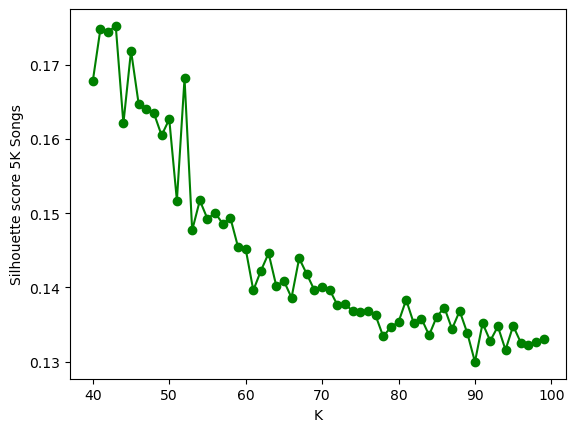

In [39]:
# plotting sil_score

plt.plot(range(40,100), sil_scores_SK, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score 5K Songs");

In [129]:
# to check the fittnes of k
km = KMeans(n_clusters = 50)
km.fit(SK)
silhouette_score(SK, km.labels_)

0.1605217408516417

In [132]:
seed=123
km = KMeans(n_clusters= 50, random_state=seed)
km.fit(SK)
silhouette_score(SK, km.labels_)

0.16275645576171607

### Experiment #1 
### k = 83

In [64]:
km = KMeans(n_clusters = 83)
km.fit(SK)

KMeans(n_clusters=83)

In [67]:
S['cluster_k=83'] = km.labels_

In [74]:
S['cluster_k=83'].describe()

count    5235.000000
mean       41.146896
std        23.568192
min         0.000000
25%        21.000000
50%        41.000000
75%        60.000000
max        82.000000
Name: cluster_k=83, dtype: float64

In [ ]:
S.groupby(by = "cluster_k=83").count()

In [ ]:
S.loc[S['cluster_k=83'] == 1, :]

### Experiment #2
### k=92

In [96]:
km = KMeans(n_clusters = 92)
km.fit(SK)

KMeans(n_clusters=92)

In [97]:
S['cluster_k=92'] = km.labels_

In [ ]:
S

### Experiment #3
### k=50

In [108]:
km = KMeans(n_clusters = 50)
km.fit(SK)

KMeans(n_clusters=50)

In [111]:
S['cluster_k=50'] = km.labels_

In [127]:
# S.loc[S['cluster_k=50'] == 0, :]
# S["cluster_k=92"].value_counts()
# 

S.groupby(by = "cluster_k=50").count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_k=83,cluster_k=92
cluster_k=50,,,,,,,,,,,,,,,
0,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
3,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
4,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
5,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
6,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
7,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
8,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99


### Trying Elbow

In [99]:
wcss = [] #Within cluster sum squares
for i in range(40,100):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(SK)
    wcss.append(km.inertia_)

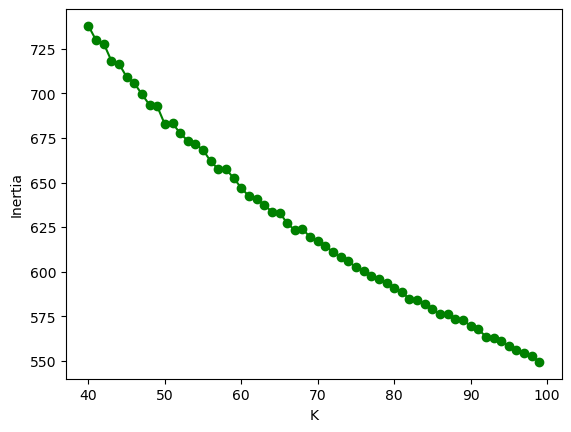

In [103]:
plt.plot(range(40,100), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

## NEW DF 

- After checking the heatmap, we decided to drop off acousticness

In [21]:
new_df = SK

In [22]:
new_df.drop('acousticness', axis = 1, inplace = True)

In [23]:
new_df.head()

,,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.000348,0.105370,0.408122,0.565171,0.063684,0.8


In [137]:
# sil score

sil_scores_new = [] 
for i in range(40,100):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(new_df)
    sil_scores_new.append(silhouette_score(new_df, km.labels_))

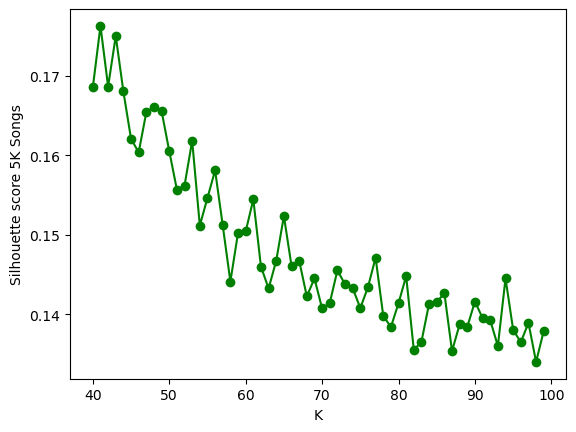

In [138]:
# plotting sil_score

plt.plot(range(40,100), sil_scores_new, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score 5K Songs");

In [179]:
seed=123
km = KMeans(n_clusters=77, random_state=seed)
km.fit(new_df)
silhouette_score(new_df, km.labels_)

0.6449152492022234

In [145]:
# Experiment #2.1
# k=77

km = KMeans(n_clusters = 77)
km.fit(new_df)

KMeans(n_clusters=77)

In [147]:
new_df['cluster_k_77'] = km.labels_

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

new_df.groupby(by = 'cluster_k_77').count()

In [ ]:
# checking the clusters

new_df.loc[new_df['cluster_k_77'] == 72, :]

In [170]:
# Experiment #2.1
# k=55

km = KMeans(n_clusters = 55)
km.fit(new_df)

KMeans(n_clusters=55)

In [171]:
new_df['cluster_k_55'] = km.labels_

In [ ]:
new_df.groupby(by = 'cluster_k_77').count()

In [181]:
new_df.sample(20)

,,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_k_77,cluster_k_55
name,artist,,,,,,,,,,,,,,
"Goodnite, It's Time to Go (Goodnight Sweetheart, Goodnight)",The Spaniels,0.387797,0.318,0.818182,0.816357,0.0,0.046078,0.000201,0.427558,0.363452,0.358138,0.033733,0.8,43,6
Only Wanna Be with You,Hootie & The Blowfish,0.506722,0.873,0.545455,0.882576,1.0,0.038671,0.000005,0.119554,0.520812,0.482602,0.052029,0.8,8,47
Divine Intent,Nile,0.339193,0.866,1.000000,0.735516,0.0,0.068845,0.547208,0.466059,0.040406,0.552250,0.093357,0.8,2,35
GAMBLER,Monsta X,0.777663,0.861,1.000000,0.933781,0.0,0.165577,0.000006,0.160081,0.604061,0.457816,0.047652,0.8,13,36
Bleeding Torment,Necrophagia,0.265770,0.771,0.090909,0.734586,0.0,0.076035,0.873096,0.283688,0.356345,0.360718,0.067798,0.8,9,53
Mein Stern - Remix 2010 by DJ Size & RocFam,Ayman,0.719752,0.905,0.818182,0.913306,1.0,0.030174,0.002487,0.089564,0.526904,0.514192,0.043944,0.8,39,23
Scared to Be Lonely,Martin Garrix,0.603930,0.540,0.090909,0.851195,0.0,0.062745,0.000000,0.264438,0.197970,0.644759,0.049728,0.8,26,7
Inbetween Days,The Cure,0.550155,0.912,0.818182,0.923250,1.0,0.039216,0.010558,0.235056,0.725888,0.665896,0.038054,0.8,14,13
Valerie,Steve Winwood,0.746639,0.518,0.818182,0.802387,1.0,0.032244,0.004599,0.086525,0.764467,0.543432,0.056544,0.8,47,38


## Removing Outlires

### FINAL EXPERIMENT

In [ ]:
#new_df.drop('cluster_k_77', axis = 1, inplace = True)

In [ ]:
#new_df.drop('cluster_k_55', axis = 1, inplace = True)

In [24]:
def remove_outliers(new_df):
   
    df = new_df.copy()
   
    for col in list(df.columns):
 
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[str(col)] >= lower_bound) & 
        (df[str(col)] <= upper_bound)]
    return df

In [25]:
song_df_no_outliers = remove_outliers(new_df)

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   float64
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   float64
 5   speechiness       5235 non-null   float64
 6   instrumentalness  5235 non-null   float64
 7   livene

In [27]:
song_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5136 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Serenade For Strings In E, Op.22, B. 52: 1. Moderato                                                                                                                           ', 'Antonín Dvořák                                  ')
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5136 non-null   float64
 1   energy            5136 non-null   float64
 2   key               5136 non-null   float64
 3   loudness          5136 non-null   float64
 4   mode              5136 non-null   float64
 5   speechiness       5136 non-null   float64
 6   instrumentalness  5136 non-null   float64
 7   livene

In [57]:
wcss = [] #Within cluster sum squares
inertia_list_a = []
for i in range(20,100):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(song_df_no_outliers)
    wcss.append(km.inertia_)
    inertia_list_a.append(round(km.inertia_))

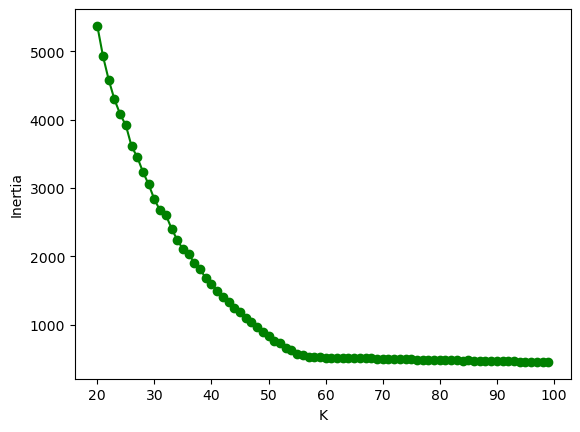

In [59]:
plt.plot(range(20,100), inertia_list_a, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

In [60]:
inertia_list_a[35]

566

In [28]:
# sil score
seed = 123

sil_scores_fin = [] 
for i in range(20,100):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(song_df_no_outliers)
    sil_scores_fin.append(silhouette_score(song_df_no_outliers, km.labels_))

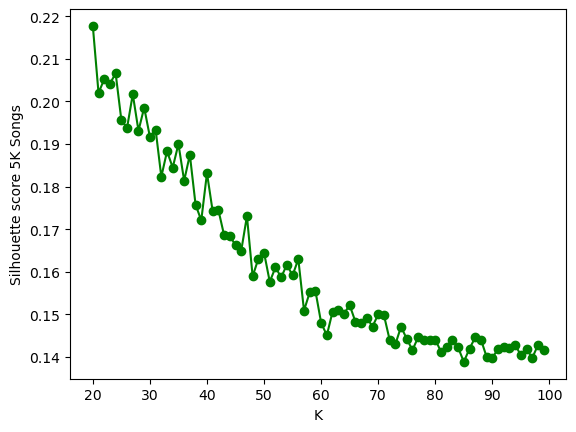

In [29]:
# plotting sil_score

plt.plot(range(20,100), sil_scores_fin, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score 5K Songs");

In [33]:
seed=123
km = KMeans(n_clusters=56, random_state=seed)
km.fit(song_df_no_outliers)
silhouette_score(song_df_no_outliers, km.labels_)

0.16297956503499353

In [34]:
# k=56

km = KMeans(n_clusters = 56)
km.fit(song_df_no_outliers)

KMeans(n_clusters=56)

In [46]:
song_df_no_outliers.to_csv("Final_one.csv")

In [35]:
song_df_no_outliers['cluster_k_56'] = km.labels_

In [41]:
song_df_no_outliers.groupby(by = "cluster_k_56").count()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster_k_56,,,,,,,,,,,,
0,84,84,84,84,84,84,84,84,84,84,84,84
1,36,36,36,36,36,36,36,36,36,36,36,36
2,140,140,140,140,140,140,140,140,140,140,140,140
3,120,120,120,120,120,120,120,120,120,120,120,120
4,103,103,103,103,103,103,103,103,103,103,103,103
5,92,92,92,92,92,92,92,92,92,92,92,92
6,193,193,193,193,193,193,193,193,193,193,193,193
7,65,65,65,65,65,65,65,65,65,65,65,65
8,103,103,103,103,103,103,103,103,103,103,103,103


In [54]:
song_df_no_outliers.loc[song_df_no_outliers['cluster_k_56'] == 54 , :]   # check 51, beach_playlist     # check 54, holiday_dinner_playlist    # check 40, just_dance_playlist

,,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_k_56
name,artist,,,,,,,,,,,,,
Não Sei,Sílvia Pérez Cruz,0.395036,0.08660,0.090909,0.748802,0.0,0.043137,0.002000,0.237082,0.159391,0.518912,0.066134,0.6,54
August Day Song,Bebel Gilberto,0.742503,0.29400,0.363636,0.760621,0.0,0.041939,0.007310,0.126646,0.240609,0.481429,0.064622,0.8,54
OBI,Toots Thielemans,0.585315,0.31400,0.363636,0.685974,0.0,0.082898,0.000449,0.085613,0.342132,0.383228,0.061541,0.8,54
Felicia and Bianca,Toots Thielemans,0.594623,0.27400,0.181818,0.675247,0.0,0.051416,0.348223,0.103343,0.637563,0.493846,0.038911,0.8,54
Paraíba,Chico César,0.588418,0.18600,0.090909,0.736233,0.0,0.039760,0.139086,0.747720,0.544162,0.392967,0.053643,0.8,54
Clandestino,Chico César,0.656670,0.39800,0.181818,0.782449,0.0,0.075599,0.000005,0.679838,0.511675,0.804664,0.035520,0.8,54
Chorando Baixinho,Raphael Rabello,0.508790,0.10200,0.181818,0.677399,0.0,0.066776,0.022538,0.092604,0.581726,0.962022,0.068224,0.8,54
Sonhos,Caetano Veloso,0.647363,0.09140,0.000000,0.648642,0.0,0.093246,0.000133,0.114488,0.478173,0.566246,0.039041,0.8,54
Get Out Of Town,Caetano Veloso,0.748707,0.19300,0.181818,0.761827,0.0,0.050654,0.001563,0.122594,0.201015,0.507412,0.053537,0.8,54
